In [26]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\TATASTEEL.NS.csv")

In [28]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,55.494999,55.779999,52.935001,55.384998,47.281101,140703330
1,2018-11-01,55.580002,56.389999,55.400002,55.660000,47.515865,54690570
2,2018-11-02,56.099998,58.240002,56.064999,57.404999,49.005539,79794570
3,2018-11-05,57.400002,58.360001,56.750000,57.744999,49.295792,45358560
4,2018-11-06,57.959999,58.439999,57.000000,57.575001,49.150665,39102740


In [29]:
new_df = df.set_index('Date')
new_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,55.494999,55.779999,52.935001,55.384998,47.281101,140703330
2018-11-01,55.580002,56.389999,55.400002,55.660000,47.515865,54690570
2018-11-02,56.099998,58.240002,56.064999,57.404999,49.005539,79794570
2018-11-05,57.400002,58.360001,56.750000,57.744999,49.295792,45358560
2018-11-06,57.959999,58.439999,57.000000,57.575001,49.150665,39102740
...,...,...,...,...,...,...
2023-10-23,123.349998,123.400002,119.699997,120.000000,120.000000,30699479
2023-10-25,121.199997,122.800003,120.750000,121.349998,121.349998,27346103
2023-10-26,120.849998,120.900002,118.900002,119.900002,119.900002,36298907


In [30]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.varmax import VARMAX

In [31]:
p = 2
q = 1

exog_data = new_df['Close']
exog = exog_data

In [32]:
model = VARMAX(new_df[['Open','High','Low']], order = (p,q),exog = exog_data)

In [33]:
results = model.fit()

In [34]:
forecast_steps = 5
exog_data = new_df['Close'][:5]
forecast = results.forecast(steps = forecast_steps,exog = exog_data)

In [35]:
forecast

,Open,High,Low
1235,82.573360,63.619031,67.906424
1236,74.334027,64.648827,65.279516
1237,57.043166,58.637764,55.842099
1238,57.739261,58.976319,56.594665
1239,57.715913,58.714716,56.559575


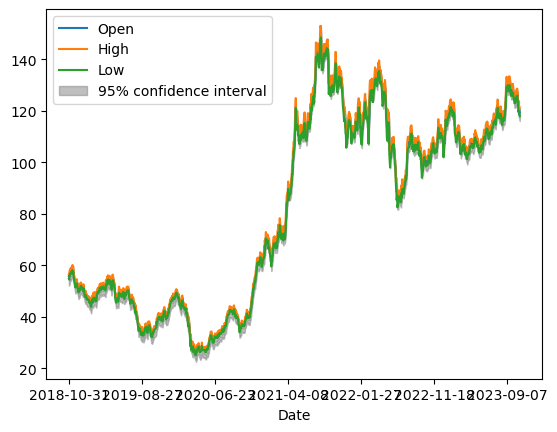

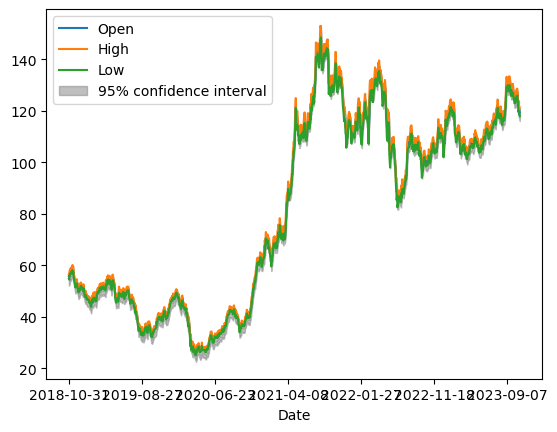

In [36]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results)